In [2]:
import control
import numpy as np

In [3]:
num = np.array([200])
den = np.array([1, 10,100])

Gs = control.TransferFunction(num, den)
Gs

TransferFunction(array([200]), array([  1,  10, 100]))

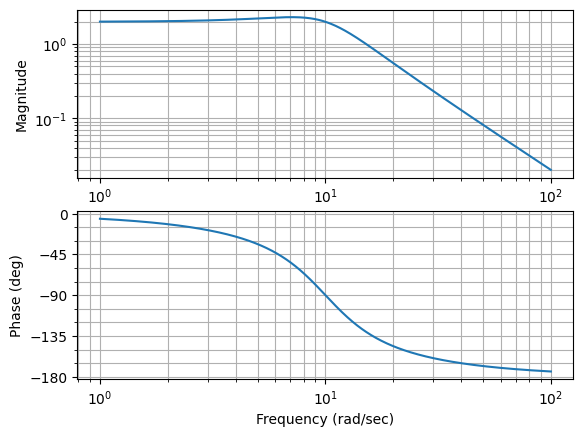

In [11]:
(mag, phase_rad, w) = control.bode_plot(Gs)

In [17]:
(GM, PM, wg, wp) = control.margin(Gs)
wp

15.174899135519796

In [25]:
def rad2hz(rad: float)->float:
    return rad*0.159155

In [26]:
largBand = rad2hz(wp)
largBand

2.415161071913653

In [27]:
freqS = 10*largBand
Ts = 1/freqS

In [30]:
print(str(freqS) + ' Hz')
print(str(Ts)+ " s")

24.15161071913653 Hz
0.04140510592147172 s


In [32]:
Gz = control.sample_system(Gs, Ts, 'zoh')
Gz

TransferFunction(array([0.14796575, 0.12881121]), array([ 1.        , -1.52257872,  0.6609672 ]), 0.04140510592147172)

In [34]:
import matplotlib.pyplot as plt

In [41]:
Tsim = np.arange(0, 10, Ts)

In [43]:
youts, T1 = control.step_response(Gs, Tsim)

In [42]:
youtz, T2 = control.step_response(Gz, Tsim)

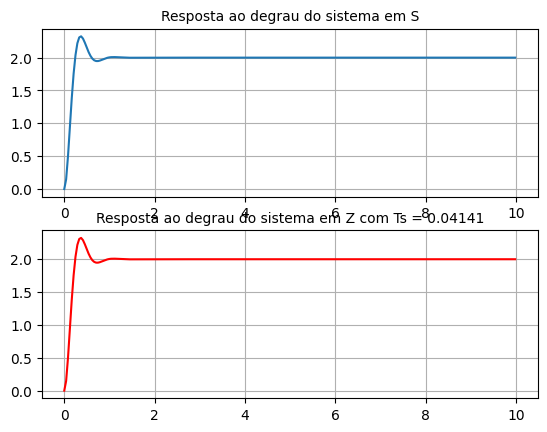

In [57]:
plt.subplot(2,1,1)
plt.title("Resposta ao degrau do sistema em S", size = 10)
plt.grid()
plt.plot(youts, T1)
plt.subplot(2,1,2)
plt.title("Resposta ao degrau do sistema em Z com Ts = "+str(round(Ts, 5)), size = 10)
plt.grid()
plt.plot(youtz, T2, color = 'red')

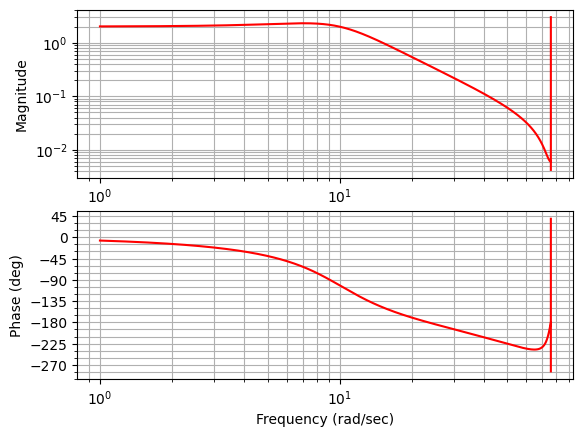

In [60]:
(mag, phase_rad, w) = control.bode_plot(Gz, color = 'red')

In [ ]:
# z = e^(Ts) = e^(Tjw)
# G(w) = 0.148e^(j0.0414w)+0.1288 / (e^(j0.0414w))^2 - 1.523e^(j0.0414w) +0.661